# Regression model with Scikit-Learn

## Get data

In [8]:
# Get input data

import os
import tarfile
from six.moves import urllib

source = 'http://raw.githubusercontent.com/ageron/handson-ml/master/'
path = 'datasets/housing'
archive_file_name = 'housing.tgz'
raw_file_name = 'housing.csv'
url = source + path + '/' + file_name

def fetch_data(url=url, path=path):
    if not os.path.isdir(path):
        os.makedirs(path)
    tgz_path = os.path.join(path, file_name)
    urllib.request.urlretrieve(url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=path)
    housing_tgz.close()
    
fetch_data()

In [13]:
# load data

import pandas as pd

def load_data(path=path):
    csv_path = os.path.join(path, raw_file_name)
    return pd.read_csv(csv_path)

data = load_data()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Examine data

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Visualise histograms for features and label

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f447c4530f0>,
      dtype=object)

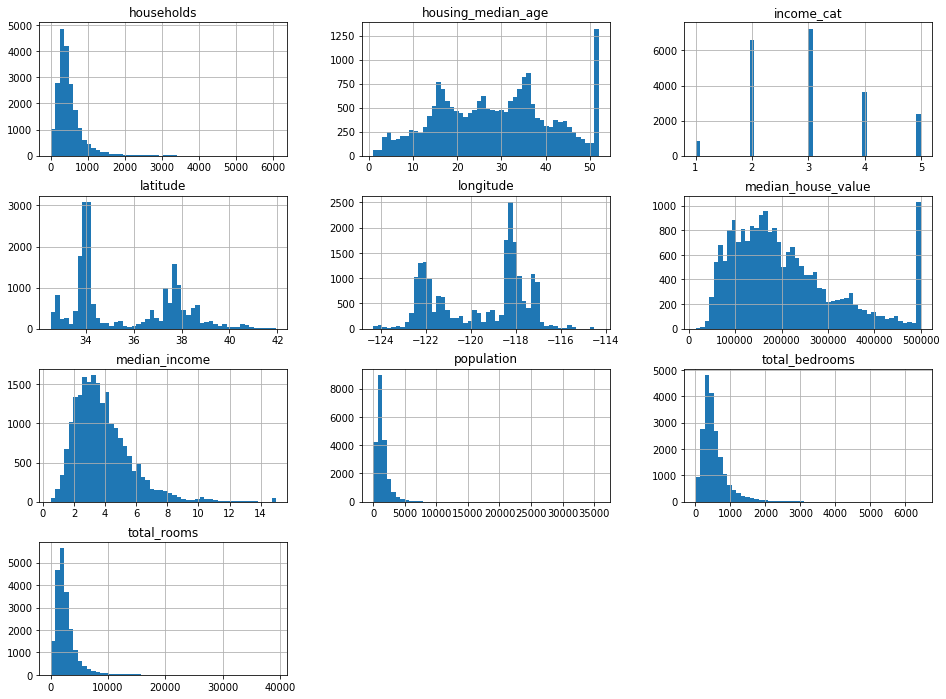

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(16,12))

# Transform features when applicable

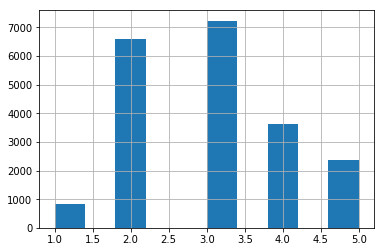

In [45]:
# transform categorical data into a numerical format

import numpy as np
data['income_cat'] = np.ceil(data['median_income']/1.5)
data['income_cat'].where(data['income_cat'] < 5, 5.0, inplace=True)
data['income_cat'].hist()

## Add meaningful synthetic feature to the data set

In [160]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']

In [161]:
# Look for feature that have significant or strong positive or negative correlation with the target/label
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Split data into Training and Test Sets using a Stratified Shuffle Split

In [162]:
# Respect the distribution of data points per income category when sampling data

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['income_cat']):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]  
    
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0,4.505810,0.231341,3.047847


In [163]:
for set_ in (train_set, test_set):
    set_.drop('income_cat', axis=1, inplace=True)

## Visualizing Geographical Data

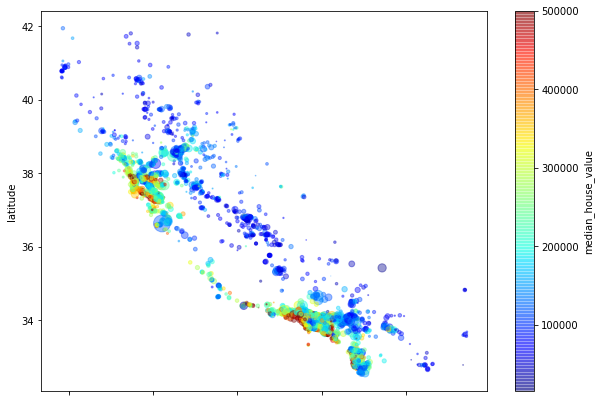

In [164]:
test_set.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
              s=test_set['population']/100, figsize=(10,7),
              c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

## Looking for Correlations

In [165]:
# Look for feature that have significant or strong positive or negative correlation with the target/label
corr_matrix = train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44754a1b38>,
      dtype=object)

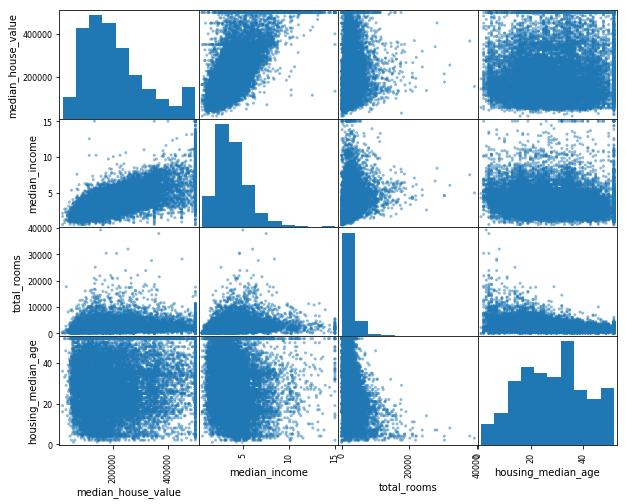

In [166]:
# Plot Scatter Matrix for promising features

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(train_set[attributes], figsize=(10,8))

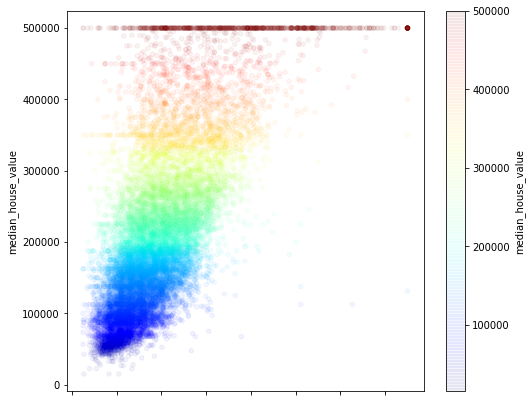

In [168]:
# Plot a scatter matrix for the most promising feature

train_set.plot(kind='scatter', x='median_income', y='median_house_value', c='median_house_value', cmap=plt.get_cmap('jet'), alpha=0.05, figsize=(8,7))

## Prepare the Data for ML Algorithms

In [171]:
housing =train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

## Data Cleaning

In [172]:
housing.dropna(subset=['total_bedrooms'])
housing.drop('total_bedrooms', axis=1)
median_tb = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median_tb, inplace=True)

In [173]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [175]:
# Use a Transformer that can fill missing data with median (or other) values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(housing_num)
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [176]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847
5,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,5.140351,0.200683,2.540351
6,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,8.061372,0.141961,2.776173
7,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,5.442667,0.143557,2.496000
8,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,4.257991,0.249330,4.374429
9,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,2.373272,0.444660,12.396313


In [177]:
# Transform labels

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [178]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [179]:
# Do one-hot encoding of categories

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

/home/dmitry/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [180]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [181]:
# Full transformation from Labels to one-host-vecors can be done in one step

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

## Feature scaling

In [182]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_tmp = scaler.fit_transform(housing_tr)
housing_num = pd.DataFrame(housing_tmp, columns=housing_tr.columns)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,0.193805,-0.086499
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.940745,-0.033534
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,0.499160,-0.092405
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,-0.208675,0.089736
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,0.324937,-0.004194
5,-0.696456,0.945009,-0.370047,0.143693,0.131447,0.025285,0.194138,-0.176435,-0.114867,-0.211891,-0.048003
6,0.537433,-0.748168,1.856709,-0.182253,-0.528198,-0.583328,-0.585720,2.366702,1.003599,-1.240095,-0.027646
7,1.166867,-0.696718,-0.210993,-0.272040,-0.586617,-0.433639,-0.324880,1.115239,0.000891,-1.212156,-0.051831
8,0.657325,-0.771554,1.459074,-0.354345,-0.167949,0.444770,-0.157197,-1.076906,-0.452724,0.639919,0.110319
9,0.647334,-0.757522,0.027588,-0.985660,-0.742400,1.138535,-0.745417,-1.772116,-1.174387,4.060146,0.802788


In [183]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [184]:
type(housing_num)
type(housing_cat_1hot)

housing_cat = pd.DataFrame({'<1H OCEAN':housing_cat_1hot[:,0],'INLAND':housing_cat_1hot[:,1],
                            'ISLAND':housing_cat_1hot[:,2], 'NEAR BAY':housing_cat_1hot[:,3],
                            'NEAR OCEAN':housing_cat_1hot[:,4]})
housing_cat.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,1,0,0,0,0


In [185]:
housing_cat.describe()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.440649,0.318738,0.000121,0.111858,0.128634
std,0.496480,0.466001,0.011005,0.315201,0.334804
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
from sklearn.base import BaseEstimator

class DataFrameSelector(BaseEstimator):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [187]:
housing_prepared = pd.concat([housing_num, housing_cat], axis=1)
housing_prepared.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,0.193805,-0.086499,1,0,0,0,0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.940745,-0.033534,1,0,0,0,0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,0.499160,-0.092405,0,0,0,0,1
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,-0.208675,0.089736,0,1,0,0,0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,0.324937,-0.004194,1,0,0,0,0


In [194]:
housing_prepared.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-4.272678e-15,2.275755e-15,-2.700521e-16,8.606884e-17,1.181562e-16,-4.347735e-17,9.614940e-18,-2.225960e-16,7.258944e-17,3.896908e-17,-1.592516e-17,0.440649,0.318738,0.000121,0.111858,0.128634
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,0.496480,0.466001,0.011005,0.315201,0.334804
min,-2.384937e+00,-1.449760e+00,-2.199168e+00,-1.223689e+00,-1.294944e+00,-1.269921e+00,-1.317668e+00,-1.772116e+00,-1.650273e+00,-1.974839e+00,-2.075303e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.111083e+00,-7.949406e-01,-8.472092e-01,-5.516890e-01,-5.793145e-01,-5.698825e-01,-5.803963e-01,-6.870806e-01,-3.822514e-01,-6.515009e-01,-5.741738e-02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.324379e-01,-6.452675e-01,2.758786e-02,-2.353301e-01,-2.458409e-01,-2.292746e-01,-2.370459e-01,-1.756999e-01,-7.966522e-02,-1.707637e-01,-2.406537e-02,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.822131e-01,9.730728e-01,6.638039e-01,2.423650e-01,2.604547e-01,2.684162e-01,2.793106e-01,4.561338e-01,2.358755e-01,4.644189e-01,1.596812e-02,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.630550e+00,2.951564e+00,1.856709e+00,1.716114e+01,1.381603e+01,3.071047e+01,1.293803e+01,5.839969e+00,5.225419e+01,1.378412e+01,1.070603e+02,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
housing_labels.describe()

count     16512.000000
mean     206990.920724
std      115703.014830
min       14999.000000
25%      119800.000000
50%      179500.000000
75%      263900.000000
max      500001.000000
Name: median_house_value, dtype: float64

## Training and Evaluating on the Training Set

In [196]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [197]:
head_len = 5
head_data = housing_prepared.iloc[:head_len]
head_labels = housing_labels.iloc[:head_len]

In [198]:
predictions = lin_reg.predict(head_data)
predictions
list(head_labels)

[286600.0, 340600.0, 196900.0, 46300.0, 254500.0]

In [199]:
list(predictions)

[209375.7426803713,
 315154.7831918404,
 210238.27856352957,
 55902.6157327517,
 183416.68718872813]

In [202]:
from sklearn.metrics import mean_squared_error
pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, pred)
lin_rmse = np.sqrt(lin_mse)
lin_mse

4645952790.395503

In [203]:
# Try other algorithms

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

pred = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, pred)
forest_rmse = np.sqrt(lin_mse)
forest_mse

/home/dmitry/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


506599444.4162585